# Visual Noise

```{tip}
This guide covers the concept, usage, and customization of visual noise patterns in `stimupy`.  
For hands-on demonstrations of how parameters affect different noise types, see the noise demos [e.g.[this](../../reference/demos/noises/binaries.md). For a high-level summary, refer to the [noise overview](../reference/_api/noises).
```

## Why Use Noise?

Visual noise patterns are useful in a wide range of experimental and applied vision science contexts, including:

- Simulating natural textures for perceptual experiments.
- Creating masking stimuli to control visibility of a target.
- Generating backgrounds for psychophysical tasks.
- Studying spatial frequency and contrast sensitivity.

Noise is not just "randomness" — different noise types (e.g., white, pink, brown) have distinct spectral characteristics that make them suitable for specific purposes.

In the following, we will look at some examples that demonstrate how you can use `stimupy` to generate noise-stimuli, and discuss some overarching considerations.´

---


## Example: Generating a Noise Background

In this example, we will create a **pink noise** stimulus, e.g. to use it as the background in an experiment. Along the way, we will cover key considerations when working with noise in `stimupy` or in vision science in general.

The relevant function is:

In [1]:
from stimupy.noises.naturals import pink
help(pink)

Help on function pink in module stimupy.noises.naturals:

pink(
    visual_size=None,
    ppd=None,
    shape=None,
    intensity_range=(0, 1),
    pseudo_noise=False,
    rng=None
)
    Draw pink (1 / f) noise texture

    Parameters
    ----------
    visual_size : Sequence[Number, Number], Number, or None (default)
        visual size [height, width] of grating, in degrees
    ppd : Sequence[Number, Number], Number, or None (default)
        pixels per degree [vertical, horizontal]
    shape : Sequence[Number, Number], Number, or None (default)
        shape [height, width] of grating, in pixels
    intensity_range : Sequence[Number, Number]
        minimum and maximum intensity value; default: (0, 1).
        be aware that not every instance has mean=(max-min)/2.
    pseudo_noise : bool
        if True, generate pseudo-random noise with ideal power spectrum
    rng : numpy.random.Generator, optional
        Random number generator to use. If None, a new default_rng is created.
    

As with other `stimupy` stimuli, you can provide the **visual size** and **pixels-per-degree** (`ppd`) to adjust stimulus size. Another important parameter is `intensity_range`, which defines the minimum and maximum luminance (or pixel values) of the generated noise.

For example, here we set the luminance range to **[0, 100] cd/m²**:

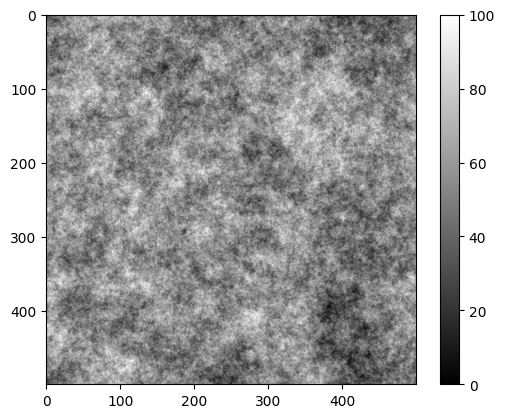

In [2]:
import matplotlib.pyplot as plt

stim = pink(visual_size=10, ppd=50, intensity_range=[0, 100])
plt.imshow(stim["img"], cmap="gray")
plt.colorbar()
plt.show()

---

### Understanding `intensity_range`

We use `intensity_range` for both noise and other stimuli to maintain a neutral, flexible definition.  
However, note:

- The `intensity_range` only sets **minimum** and **maximum** possible values.
- The actual mean luminance of the noise will vary because the pixel values are randomly distributed.
- **It is _not_ guaranteed** that the mean will be exactly halfway between the min and max.

Example:

In [3]:
print("Mean intensity = %.3f" % stim["img"].mean())

Mean intensity = 54.219


---

### Controlling Mean Intensity and Contrast

For many experiments, you may want the **mean luminance** and **contrast** of your noise to be precisely defined.  
The most common contrast measure is **root-mean-square (RMS) contrast** or **normalized RMS contrast**, i.e. RMS contrast divided by mean luminance.

`stimupy` provides utility functions for adjusting a stimulus' mean and RMS contrast directly. Let's look at how they change the noise pattern.

Mean intensity = 50.000
RMS contrast = 0.200


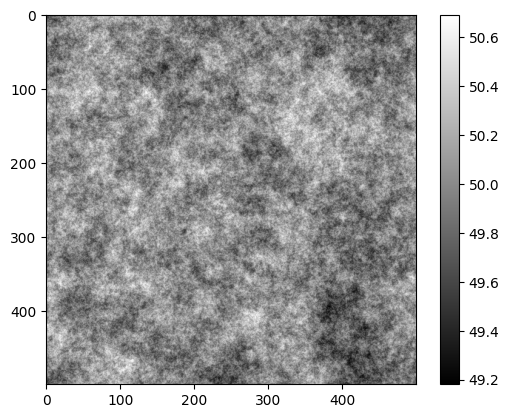

In [4]:
from stimupy.utils.contrast_conversions import adapt_rms_contrast_dict

stim = adapt_rms_contrast_dict(
    stim=stim,
    rms_contrast=0.2,     # target RMS contrast
    mean_luminance=50     # target mean luminance in cd/m²
)

print("Mean intensity = %.3f" % stim["img"].mean())
print("RMS contrast = %.3f" % stim["img"].std())

plt.imshow(stim["img"], cmap="gray")
plt.colorbar()
plt.show()

or alternatively, the normalized RMS-contrast:

Mean intensity = 50.000
Normalized RMS contrast = 0.200


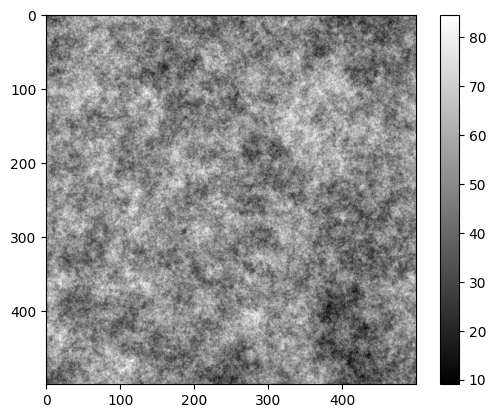

In [5]:
from stimupy.utils.contrast_conversions import adapt_normalized_rms_contrast_dict

stim = adapt_normalized_rms_contrast_dict(
    stim=stim,
    rms_contrast=0.2,     # target RMS contrast
    mean_luminance=50     # target mean luminance in cd/m2
)

print("Mean intensity = %.3f" % stim["img"].mean())
print("Normalized RMS contrast = %.3f" % (stim["img"].std() / stim["img"].mean()))

plt.imshow(stim["img"], cmap="gray")
plt.colorbar()
plt.show()

---


**Key Takeaways:**

- `intensity_range` sets only the allowable min/max pixel values.
- Use `adapt_rms_contrast_dict` (or similar functions) to ensure precise control over mean luminance and contrast.
- Different noise types will have different spectral properties—choose based on your experimental needs.